<a href="https://colab.research.google.com/github/dariarozhnova/my_projects/blob/main/test_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Emotion Recognition on the dataset and on video frames

**Student name, ID and cohort:** Daria Rozhnova (210046427) - PG


# Notebook Setup
In this section you should include all the code cells required to test your coursework submission. Specifically:

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Define Local Path

In the next cell you should assign to the variable `GOOGLE_DRIVE_PATH_AFTER_MYDRIVE` the relative path of this folder in your Google Drive.

**IMPORTANT:** you have to make sure that **all the files required to test your functions are loaded using this variable** (as was the case for all lab tutorials). In other words, do not use in the notebook any absolute paths. This will ensure that the markers can run your functions. Also, **do not use** the magic command `%cd` to change directory.



In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the CW_folder_PG
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Computer Vision/CW_folder_PG'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/CompVis/CW_Folder_PG'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Video', 'CW_Dataset', 'Code', 'Models', 'test_functions.ipynb']


### Load packages 

In the next cell you should load all the packages required to test your functions.

In [ ]:
import os
import joblib
import numpy as np
from skimage import io, color
from skimage.feature import hog
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import joblib
import cv2
from skimage import img_as_ubyte
from matplotlib import patches
import random

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


### Load models

In the next cell you should load all your trained models for easier testing of your functions. Avoid to load them within `EmotionRecognition` and `EmotionRecognitionVideo` to avoid having to reload them each time.

In [ ]:
class Net(nn.Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = nn.Sequential(
            # Defining a 2D convolution layer
            nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = nn.Sequential(
            nn.Linear(25 * 10 * 10, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

net = Net()
net.to(device)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=2500, out_features=10, bias=True)
  )
)

In [ ]:
GOOGLE_DRIVE_PATH_TEST_DATA = 'Colab Notebooks/CompVis/CW_Folder_PG/CW_Dataset/test'
GOOGLE_DRIVE_TEST_DATA = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_TEST_DATA)

GOOGLE_DRIVE_PATH_MODELS = ('drive/My Drive/Colab Notebooks/CompVis/CW_Folder_PG')
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH_MODELS, 'Models')

SVM_HOG_filename = os.path.join(CODE_PATH, 'SVM_HOG.py')
SVM_HOG= joblib.load(SVM_HOG_filename)

MLP_HOG_filename = os.path.join(CODE_PATH, 'MLP_HOG.py')
MLP_HOG= joblib.load(MLP_HOG_filename)

PATH = os.path.join(CODE_PATH, 'CNN.pth')
net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

# Test EmotionRecognition

This section should allow a quick test of the `EmotionRecognition` function. First, add cells with the code needed to load the necessary subroutines to make `EmotionRecognition` work.

In [ ]:
images_test = []
filenames = []
n_train_samples = 4
random_int = random.randint(1,3090)
for filename in os.listdir(GOOGLE_DRIVE_TEST_DATA)[random_int:n_train_samples+random_int]:
  img = io.imread(os.path.join(GOOGLE_DRIVE_TEST_DATA,filename))
  if img is not None:
    images_test.append(img)
    filenames.append(filename)
labels_test = open('drive/My Drive/Colab Notebooks/CompVis/CW_Folder_PG/CW_Dataset/labels/list_label_test.txt')
mylabels_test= labels_test.read().splitlines()
image_list_test =[]
label_list_test = []
for label in mylabels_test:
  image_code = label[:-1]
  image_code1 = image_code[:13]
  label_code=label[-1]
  image_list_test.append(image_code1)
  label_list_test.append(label_code)
  
filenames_new_t=[]
for f in filenames:
  filenames_new_t.append(f[:9]+f[-4:])

test_labels=[]
for f in filenames_new_t:
  index = image_list_test.index(f)
  test_labels.append(label_list_test[index])
test_images_grey = []
for img in images_test:
  img = color.rgb2gray(img)  
  test_images_grey.append(img)

X_test = test_images_grey
  

hog_features_test= []
for image in X_test:
  hog_feature_t = hog(image, orientations=8, pixels_per_cell=(8,8),cells_per_block=(2, 2),block_norm= 'L2')
  hog_features_test.append(hog_feature_t)


Then, make a call to the `EmotionRecognition` function to see what results it produces. You must also indicate the syntax needed to test your different models.

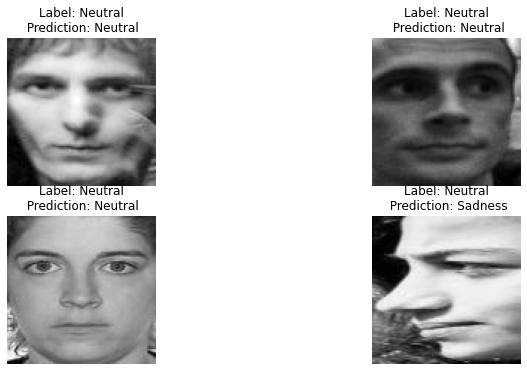

In [ ]:
# Syntax for the next function is the following:
# 
# EmotionRecognition(path_to_testset, model_type)
# 
# where model_type can be one of
#   - SVM_HOG
#   - MLP_HOG
#   - CNN

def EmotionRecognition(path_to_testset, model_type):
  global y_pred
  global y_test
  global images
  if model_type == 'SVM_HOG':
    model= SVM_HOG[0]
    images = X_test
    y_pred = model.predict(hog_features_test)
    y_test = np.asarray(test_labels).astype(int)
  if model_type == 'MLP_HOG':
    model= MLP_HOG[0]
    images = X_test
    y_pred = model.predict(hog_features_test)
    y_test = np.asarray(test_labels).astype(int)
  if model_type == "CNN":
    test_x=[]
    y_test = np.asarray(test_labels).astype(int)
    for i in range(len(X_test)):
      test_x.append([torch.from_numpy(np.asarray(X_test[i])),torch.from_numpy(np.asarray(y_test[i]))])
    testloader = torch.utils.data.DataLoader(test_x, batch_size=4,shuffle=True, num_workers=2)
    pred = []
    with torch.no_grad():
      for data in testloader:
        images, labels = data[0].to(device),data[1].to(device)
        images = images.float()
        images = images.unsqueeze(1)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        predicted=predicted.cpu()
        images= images.cpu()
        labels= labels.cpu()
        pred.append([predicted,images,labels])
    predicted,images,labels= pred[0]

    images = images.numpy().reshape(4,100,100).tolist()
    y_test = labels.numpy().tolist()
    y_pred = predicted.numpy().tolist()

  dic = {1:'Surprise', 2:'Fear', 3:'Disgust', 4:'Happiness', 5:'Sadness', 6:'Sadness', 7:'Neutral'}
  emotions_test=[dic.get(n, n) for n in y_test]
  emotions_pred=[dic.get(n, n) for n in y_pred] 
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharex=True, sharey=True)
  ax = axes.ravel()

  for i in range(4):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(f'Label: {emotions_test[i]}\n Prediction: {emotions_pred[i]}')
    ax[i].set_axis_off()
    
  fig.tight_layout
  plt.show() 

GOOGLE_DRIVE_PATH_TEST_DATA = 'Colab Notebooks/CompVis/CW_Folder_PG/CW_Dataset/test'
path_to_testset = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_TEST_DATA)

EmotionRecognition(path_to_testset, 'MLP_HOG')
#EmotionRecognition(path_to_testset, 'SVM_HOG')
#EmotionRecognition(path_to_testset, 'CNN')

# Test EmotionRecognitionVideo

This section should allow a quick test of the `EmotionRecognitionVideo` function. First, add cells with the code needed to load the necessary subroutines to make `EmotionRecognitionVideo` work.

In [ ]:
# load every 10th image ffrom folder
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in sorted(os.listdir(folder))[0::10]:
      img = io.imread(os.path.join(folder,filename))
      if img is not None:
        images.append(img)
        filenames.append(filename)
    return images, filenames

path = os.path.join(GOOGLE_DRIVE_PATH,'Video','Extracted images')
frames = load_images_from_folder(path)

GOOGLE_DRIVE_PATH_MODELS = ('drive/My Drive/Colab Notebooks/CompVis/CW_Folder_PG')
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH_MODELS, 'Models')

model_filename = os.path.join(CODE_PATH, 'MLP_HOG.py')
model_HOG= joblib.load(model_filename)
model = model_HOG[0]


Then, make a call to the `EmotionRecognitionVideo` function to see what results it produces.

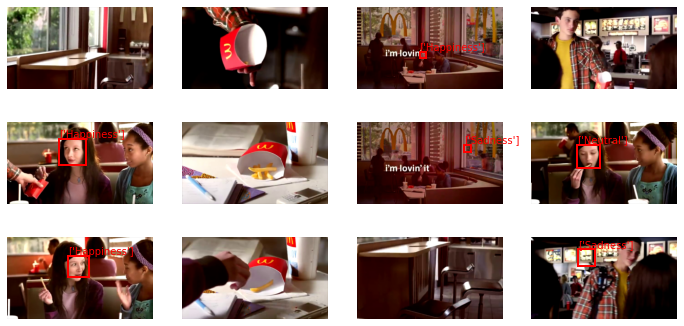

In [ ]:
# Syntax for the next function is the following:
# 
# EmotionRecognitionVideo(file)
# file in this case is the path to the folder containing all frames as images extracted 
# from a video 

def EmotionRecognitionVideo(file):
  images = frames[0]
  images_12 = random.sample(images, 12)
  %matplotlib inline
  fig, axes = plt.subplots(nrows=3, ncols=4, figsize = (12,6), sharex=True, sharey=True)
  ax = axes.ravel()
  for i in range(12):
    img_gray = color.rgb2gray(images_12[i])
    img_gray = img_as_ubyte(img_gray)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

    for (x,y,w,h) in faces:
      roi_gray=img_gray[y:y+w,x:x+h] #face area from  image  
      roi_gray=cv2.resize(roi_gray,(100,100))  
      img = roi_gray.reshape((100,100))
      img = img /255.0
      hog_f = hog(img, orientations=8, pixels_per_cell=(8,8),cells_per_block=(2, 2),block_norm= 'L2')
      hog_f = hog_f.reshape(1, -1)
      y_pred = model.predict(hog_f)

      dic = {1:'Surprise', 2:'Fear', 3:'Disgust', 4:'Happiness', 5:'Sadness', 6:'Sadness', 7:'Neutral'}
      emotions_pred=[dic.get(n, n) for n in y_pred]

      ax[i].add_patch(
          patches.Rectangle(xy=(x, y), width=w, height=h,
                              fill=False, color='r', linewidth=2))

      ax[i].text(x, y, emotions_pred,
              horizontalalignment='left',
              verticalalignment='bottom',
              color='r', fontsize=10)
    ax[i].imshow(images_12[i])
    ax[i].set_axis_off()

  fig.tight_layout
  plt.show()

path = os.path.join(GOOGLE_DRIVE_PATH,'Video','Extracted images')
EmotionRecognitionVideo(path)